<a href="https://colab.research.google.com/github/dlwub/Final_Project_AIMS/blob/main/Final_Project_AR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Auto Regressive (AR)


In [ ]:
import ipywidgets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import aic, bic
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [ ]:
mergedData = pd.read_csv("/content/mergedData.csv")

### Non stationarity of the CPI data

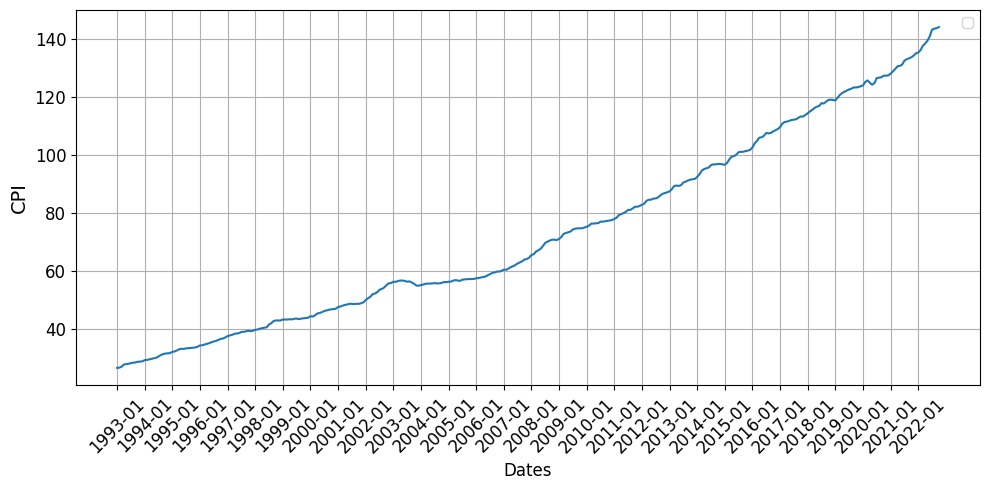

In [ ]:
plt.figure(figsize=(10, 5))
dates = mergedData['DATE']
plt.plot(dates, mergedData['CPI'])
plt.xlabel('Dates', fontsize=12)
plt.ylabel('CPI',fontsize=14)
#plt.title('CPI Historical Data')
plt.xticks(rotation=45)
plt.xticks(range(0, len(dates), 12), dates[::12], fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

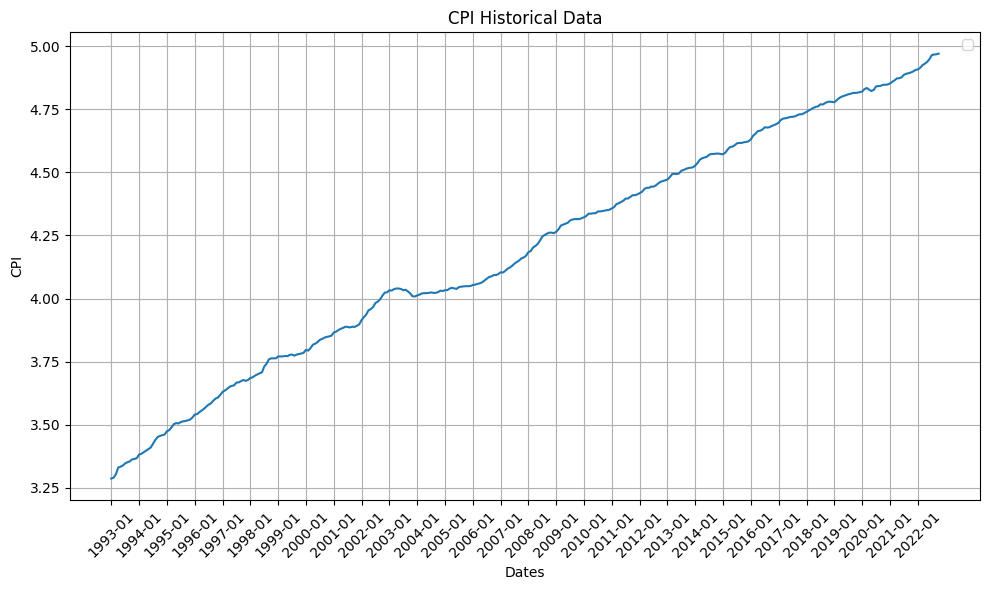

In [ ]:
plt.figure(figsize=(10, 6))
dates = mergedData['DATE']
plt.plot(dates, np.log(mergedData['CPI']))
plt.xlabel('Dates')
plt.ylabel('CPI')
plt.title('CPI Historical Data')
plt.xticks(rotation=45)
plt.xticks(range(0, len(dates), 12), dates[::12])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Function to split the data into train and test set
def get_train_test_set(duration):
  train_size = mergedData.shape[0] - duration
  train, test = mergedData[:train_size], mergedData[train_size:]
  return train, test

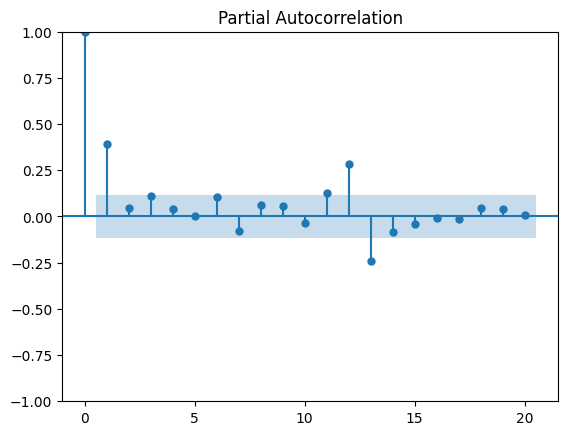

In [ ]:
train, test = get_train_test_set(int(mergedData.shape[0]*0.2))

target = train['CPI']

def check_stationarity(timeseries):
    result = adfuller(timeseries)
    return result[1] < 0.05

# Difference the series if not stationary
if not check_stationarity(target):
    target = target.diff().dropna()

# Plot PACF to determine lag
plot_pacf(target, lags=20)
plt.show()

In [ ]:
optimal_lag = 3

# Fit the AR model
model = AutoReg(target, lags=optimal_lag)
model_fit = model.fit()

print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                    CPI   No. Observations:                  286
Model:                     AutoReg(3)   Log Likelihood                 -34.589
Method:               Conditional MLE   S.D. of innovations              0.273
Date:                Fri, 14 Jun 2024   AIC                             79.178
Time:                        12:37:31   BIC                             97.405
Sample:                             3   HQIC                            86.486
                                  286                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1446      0.026      5.473      0.000       0.093       0.196
CPI.L1         0.3690      0.059      6.273      0.000       0.254       0.484
CPI.L2         0.0100      0.063      0.158      0.8

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Get aic and bic lags
max_lag = 10

aic_values = []
bic_values = []

for lag in range(1, max_lag + 1):
    model = AutoReg(target, lags=lag)
    model_fitted = model.fit()
    aic_values.append(model_fitted.aic)
    bic_values.append(model_fitted.bic)

best_aic_lag = aic_values.index(min(aic_values)) + 1
best_bic_lag = bic_values.index(min(bic_values)) + 1

print("Best lag order (AIC):", best_aic_lag)
print("Best lag order (BIC):", best_bic_lag)

Best lag order (AIC): 3
Best lag order (BIC): 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

In [ ]:
# Plot predicted vs real values with dates on the x-axis
def get_test_metric(duration, lag_order):
  train, test = get_train_test_set(duration)

  # Fit AR model
  model = AutoReg(train['CPI'], lags=lag_order)
  model_fit = model.fit()
  y_pred = model_fit.predict(start=len(train['CPI']), end=len(train['CPI'])+len(test['CPI'])-1, dynamic=False)

  # Forecast
  mae = mean_absolute_error(test['CPI'], y_pred)
  rmse = np.sqrt(mean_squared_error(test['CPI'], y_pred))

  return mae, rmse

In [ ]:
mae_test_1, rmse_test_1 = get_test_metric(int(mergedData.shape[0]*0.2), 1)
mae_test_3, rmse_test_3  = get_test_metric(int(mergedData.shape[0]*0.2), 3)

In [ ]:
print("Mean Absolute Error on Test Data for AR(1): {:.2f}".format(mae_test_1))
print("Mean Absolute Error on Test Data for AR(3): {:.2f}".format(mae_test_3))
print("Root Mean Squared Error on Test Data for AR(1): {:.2f}".format(rmse_test_1))
print("Root Mean Squared Error on Test Data for AR(3): {:.2f}".format(rmse_test_3))

Mean Absolute Error on Test Data for AR(1): 2.84
Mean Absolute Error on Test Data for AR(3): 2.68
Root Mean Squared Error on Test Data for AR(1): 3.51
Root Mean Squared Error on Test Data for AR(3): 3.34


### Ploting the curve

In [ ]:
# Plot predicted vs real values with dates on the x-axis
def plot_AR(duration, lag_order):
  train, test = get_train_test_set(duration)
  test_date = mergedData.iloc[-duration:, 0]

  # Fit AR model
  model = AutoReg(train['CPI'], lags=lag_order)
  model_fit = model.fit()

  # Forecast
  results = {}
  forecast = model_fit.forecast(steps=duration)
  actual = test['CPI'].iloc[-duration:]

  mae = float(format(mean_absolute_error(actual, forecast), '.2f'))
  rmse = float(format(np.sqrt(mean_squared_error(actual, forecast)), '.2f'))

  results[duration] = {'MAE': mae, 'RMSE': rmse}
  print(results)

  # Interactive plot
  y_test = test['CPI']

  plt.figure(figsize=(10, 5))
  plt.plot(test_date, actual, label='Test', marker='o')
  plt.plot(test_date, forecast, label='Predictions', marker='x')
  plt.xlabel('Dates',  fontsize=12)
  plt.ylabel('CPI',  fontsize=14)
  #plt.title('Predicted vs Real Values (AR(%d) model - %s prediction)' %(lag_order, "test" if duration > 24 else "%d months" %duration))
  plt.xticks(rotation=45)
  plt.xticks(range(0, len(test_date), 6), test_date[::6], fontsize=12)
  plt.yticks(fontsize=12)
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

In [ ]:
train, test = get_train_test_set(int(mergedData.shape[0]*0.2))

### AR(1)

{71: {'MAE': 2.84, 'RMSE': 3.51}}


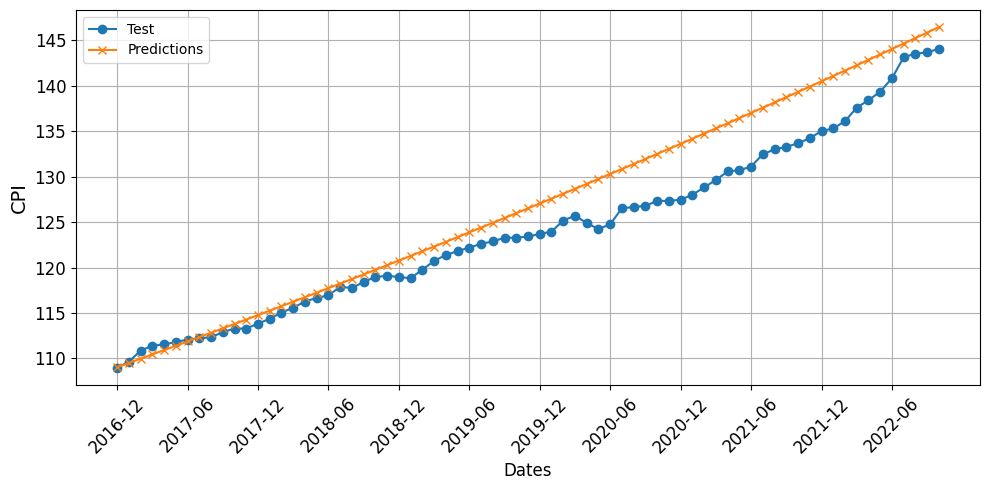

In [ ]:
plot_AR(len(test), 1)

### AR(3)

{71: {'MAE': 2.68, 'RMSE': 3.34}}


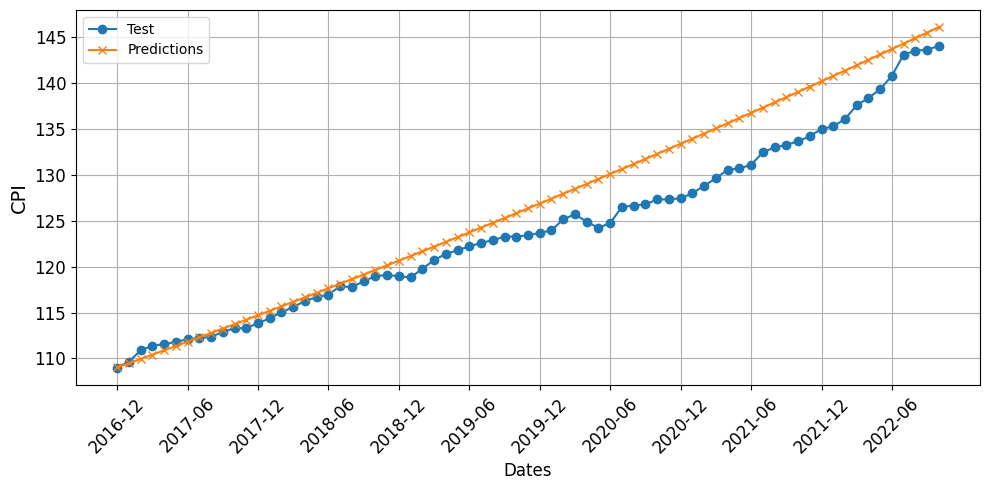

In [ ]:
plot_AR(len(test), 3)

### Forecast (Interactive plot)

In [ ]:
ipywidgets.interact(plot_AR, duration=ipywidgets.SelectionSlider(options=[1, 3, 6, 12, 24]), lag_order=(1, 3, 2))

interactive(children=(SelectionSlider(description='duration', options=(1, 3, 6, 12, 24), value=1), IntSlider(v…

<function __main__.plot_AR(duration, lag_order)>